In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

redshifts = np.loadtxt('../../mhyl_2pcf/Redshifts.txt')
redshifts_dict = {}
for info in redshifts:
    snapid, red = int(info[0]), info[2]
    redshifts_dict[snapid] = red

def plot_difference(X1,X,Y1,Y):
    fig = plt.figure(figsize=(14,3))
    ax = fig.add_subplot(111)
    Xs, rats= [], []
    for row in range(len(X1)):
        if Y1[row]>0 and Y[row]>0:
            rat = Y[row] / Y1[row]
            #print X1[row], rat
            Xs.append(X1[row]); rats.append(rat)
    ax.plot(Xs, rats)
    ax.grid()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #ax.set_xlabel('', fontsize=18); ax.set_ylabel('Ratio', fontsize=18)
    ## 美化一下。。。
    # plt.savefig(r'2pcf difference.pdf', format='pdf')
    plt.show()
    # plt.savefig(r'2pcf difference'.pdf, format='pdf')

Populating the interactive namespace from numpy and matplotlib


### COLA particle?

### COLA FOF halo, BigMD Rockstar halo

In [200]:
!ls -alh /home/xiaodongli/projects/simulation/cola_output_nstep80/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf

-rw-r--r-- 1 xiaodongli xiaodongli 1.6M 3月  11 12:06 /home/xiaodongli/projects/simulation/cola_output_nstep80/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf


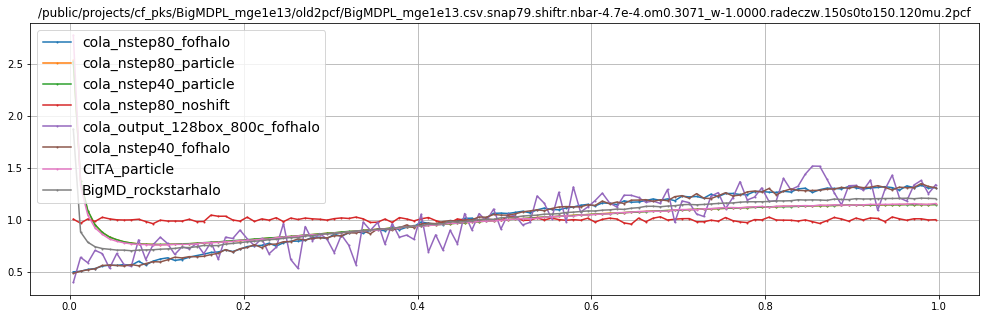

In [21]:
fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(111)
for filename_label in [
    ['/home/xiaodongli/projects/simulation/cola_output_nstep80/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_nstep80_fofhalo'],
    ['/home/xiaodongli/projects/simulation/cola_output_nstep80/sub00001c.txt.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_nstep80_particle'],
    ['/home/xiaodongli/projects/simulation/cola_output_nstep40/sub00001c.txt.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_nstep40_particle'],
    ['/home/xiaodongli/projects/simulation/cola_output_nstep80/fof00001c.nbar-4.7e-4.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_nstep80_noshift'],
    ['/home/xiaodongli/projects/simulation/cola_output_128box_800c/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_output_128box_800c_fofhalo'],
    ['/home/xiaodongli/projects/simulation/cola_output_nstep40/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf',
     'cola_nstep40_fofhalo'],
    #['/home/xiaodongli/projects/simulation/cola_output/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
    # 'cola_nstep10_fofhalo'],
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_016.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle'],
    ['/public/projects/cf_pks/BigMDPL_mge1e13/old2pcf/BigMDPL_mge1e13.csv.snap79.shiftr.nbar-4.7e-4.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'BigMD_rockstarhalo']
    ]:
    filename, label = filename_label
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    data = np.loadtxt(filename)
    numsbin=150; nummubin=120;
    s_min=6; s_max = 40;
    
    xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
    for rows in range(numsbin):
        for rowmu in range(nummubin):
            irow = rows*nummubin+rowmu
            DD = data[irow][3]/norms[0]
            DR = data[irow][4]/norms[1]
            RR = data[irow][6]/norms[2]
            xi[rows][rowmu] = (DD - 2*DR + RR)/RR
    intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
    mu = [data[row][0] for row in range(120)]
    X = [1-data[row][0] for row in range(120)]
    #dmu = [mu[i+1]-mu[i] for i in range(119)]

    int_intximu_to_mu = sum([intximu[row]*1.0/120 for row in range(120)])
    Y = intximu/int_intximu_to_mu
    #Y = intximu

    ax.plot(X, Y, marker='o', markersize=1, label=label )
    ax.set_title(filename)
ax.grid()
ax.legend(fontsize=14)

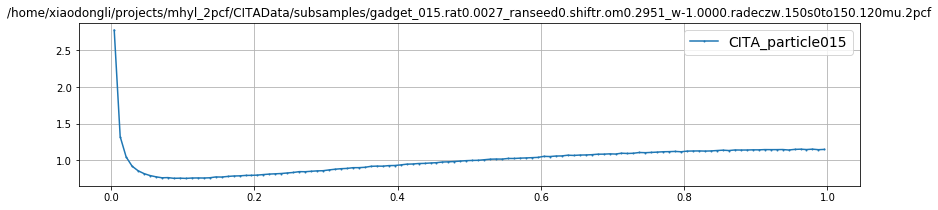

In [22]:
fig = plt.figure(figsize=(14, 3))
ax = fig.add_subplot(111)
for filename_label in [
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_015.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle015']
    ]:
    filename, label = filename_label
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    data = np.loadtxt(filename)
    numsbin=150; nummubin=120;
    s_min=6; s_max = 40;
    
    xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
    for rows in range(numsbin):
        for rowmu in range(nummubin):
            irow = rows*nummubin+rowmu
            DD = data[irow][3]/norms[0]
            DR = data[irow][4]/norms[1]
            RR = data[irow][6]/norms[2]
            xi[rows][rowmu] = (DD - 2*DR + RR)/RR
    intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
    mu = [data[row][0] for row in range(120)]
    X1 = [1-data[row][0] for row in range(120)]
    #dmu = [mu[i+1]-mu[i] for i in range(119)]

    int_intximu_to_mu = sum([intximu[row]*1.0/120 for row in range(120)])
    Y1 = intximu/int_intximu_to_mu
    #Y = intximu

    ax.plot(X1, Y1, marker='o', markersize=1, label=label )
    ax.set_title(filename)
ax.grid()
ax.legend(fontsize=14)

Text(0.5,0,'1-mu')

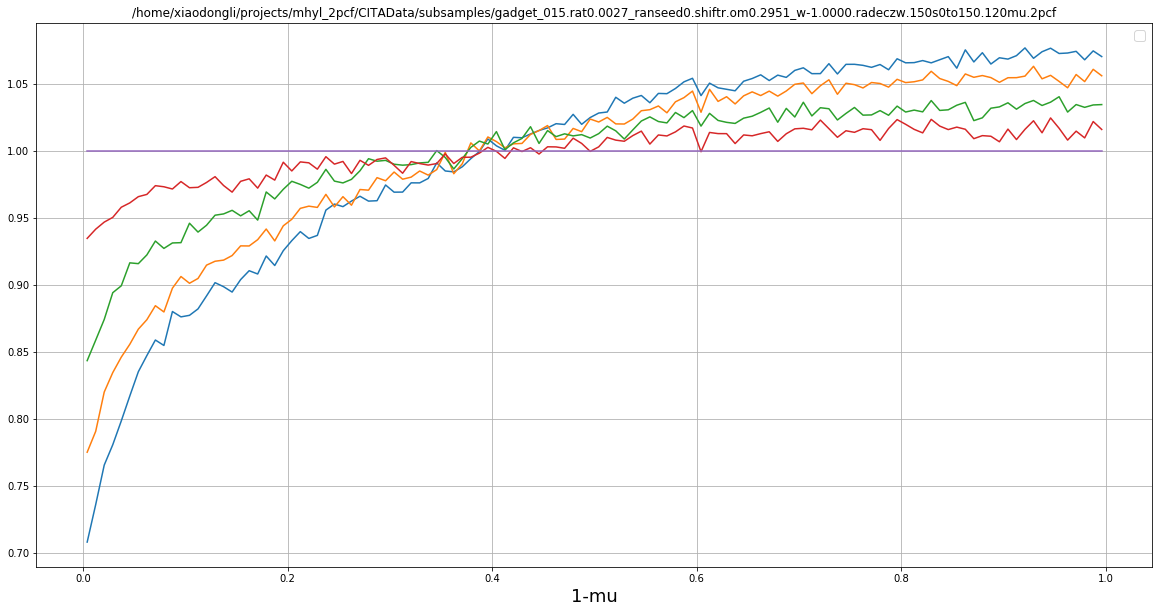

In [26]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
for filename_label in [
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_011.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle011'],
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_012.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle012'],
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_013.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle013'],
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_014.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle014'],
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_015.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle015'],
    #['/home/xiaodongli/projects/simulation/cola_output_cita/cola_cita_015.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'cola_output_cita015'],
    #['/home/xiaodongli/projects/simulation/cola_output_cita/cola_cita_014.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
    # 'cola_output_cita014'],
    #['/home/xiaodongli/projects/simulation/cola_output_cita/cola_cita_013.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'cola_output_cita013'],
    #['/home/xiaodongli/projects/simulation/cola_output_cita/cola_cita_012.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'cola_output_cita012']
    #['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_016.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'CITA_particle016'],
    ]:
    filename, label = filename_label
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    data = np.loadtxt(filename)
    numsbin=150; nummubin=120;
    s_min=6; s_max = 40
    
    xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
    for rows in range(numsbin):
        for rowmu in range(nummubin):
            irow = rows*nummubin+rowmu
            DD = data[irow][3]/norms[0]
            DR = data[irow][4]/norms[1]
            RR = data[irow][6]/norms[2]
            xi[rows][rowmu] = (DD - 2*DR + RR)/RR
    intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
    mu = [data[row][0] for row in range(120)]
    X = [1-data[row][0] for row in range(120)]
    #dmu = [mu[i+1]-mu[i] for i in range(119)]

    int_intximu_to_mu = sum([intximu[row]*1.0/120 for row in range(120)])
    Y = intximu/int_intximu_to_mu
    #Y = intximu
    Xs, rats= [], []
    for row in range(len(X1)):
        if Y1[row]>0 and Y[row]>0:
            rat = Y[row] / Y1[row]
            #print X1[row], rat
            Xs.append(X1[row]); rats.append(rat)
    ax.plot(Xs, rats)
    #fig = plt.figure(figsize=(14, 3))
    #ax = fig.add_subplot(111)
    #ax.plot(X, Y, marker='o', markersize=1, label=label )
ax.set_title(filename)
ax.grid()
ax.legend(fontsize=14)
ax.set_xlabel('1-mu', fontsize=18)

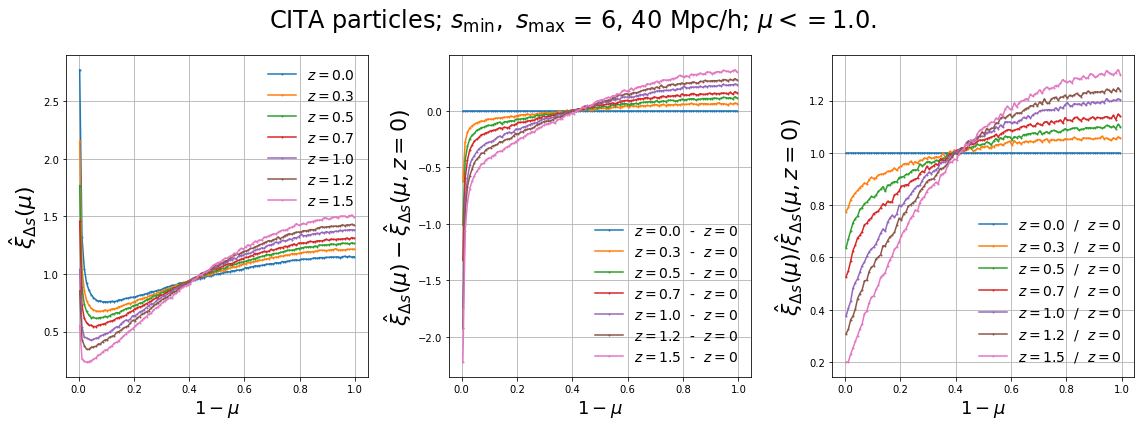

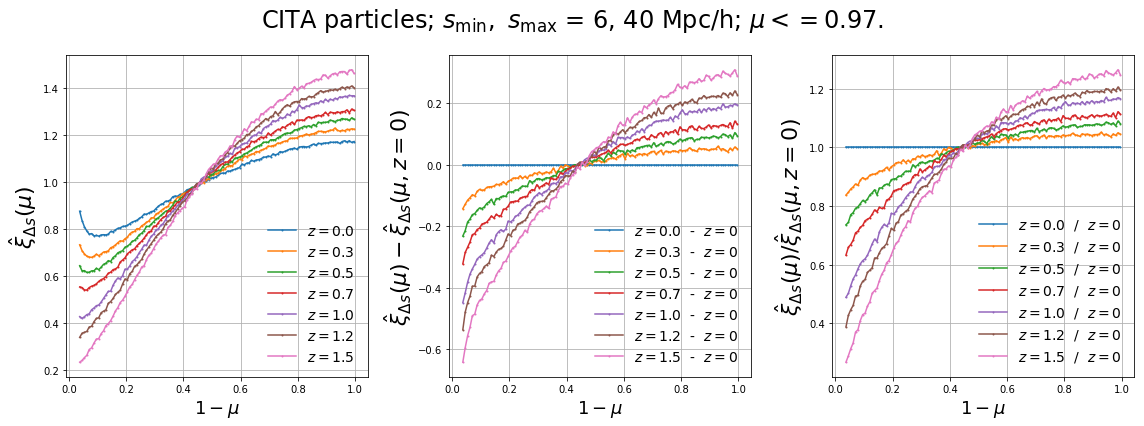

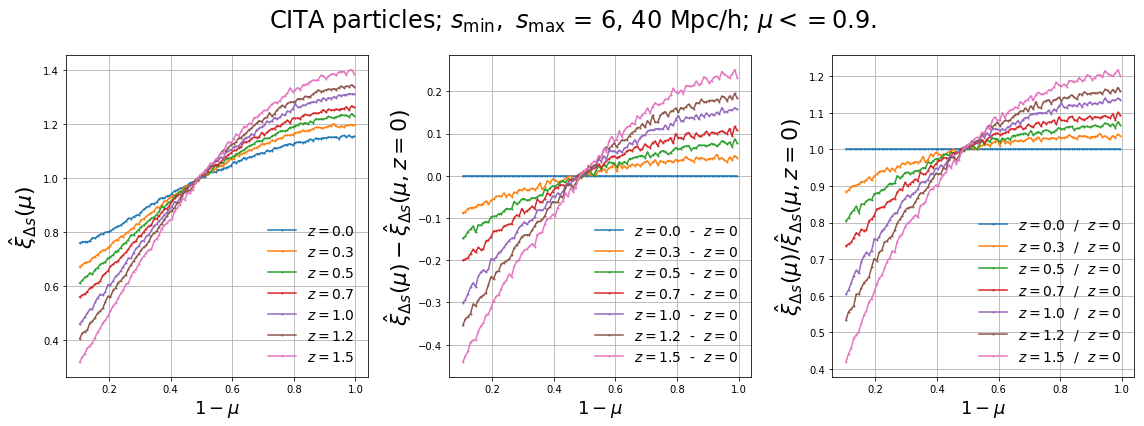

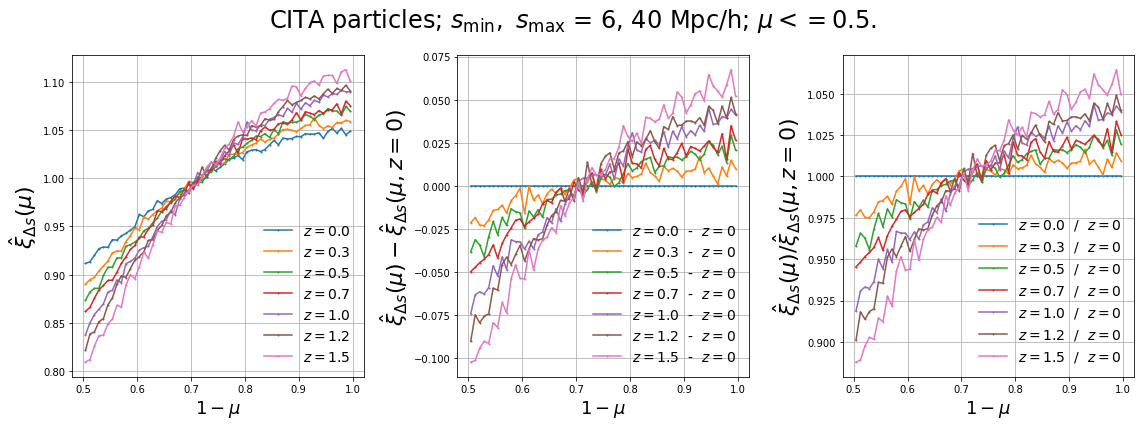

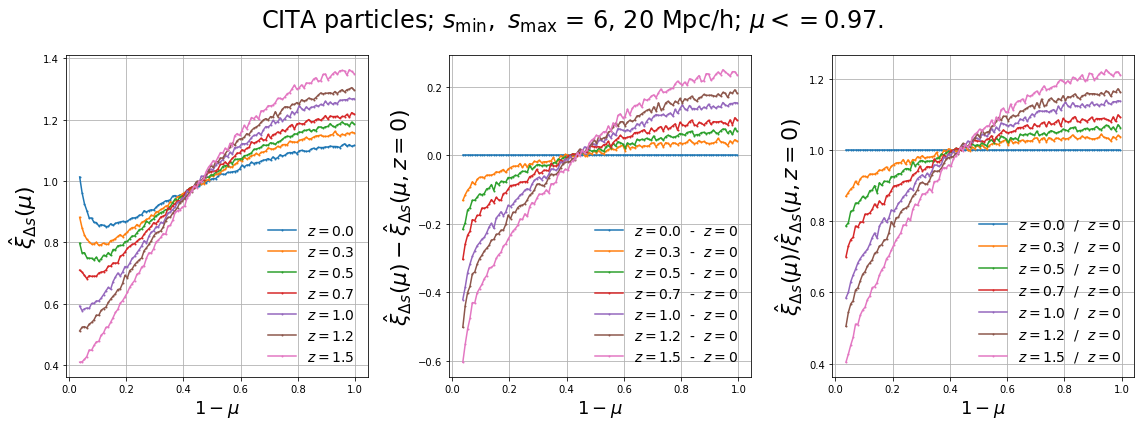

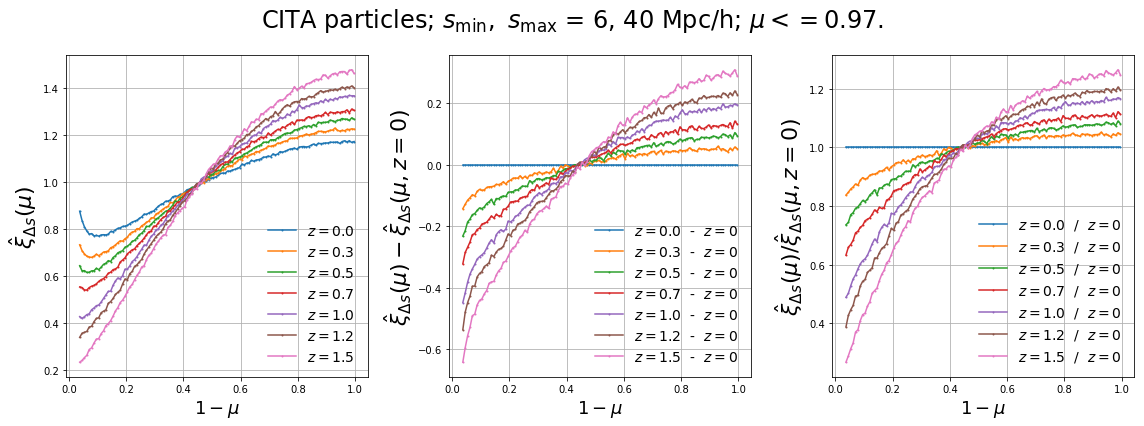

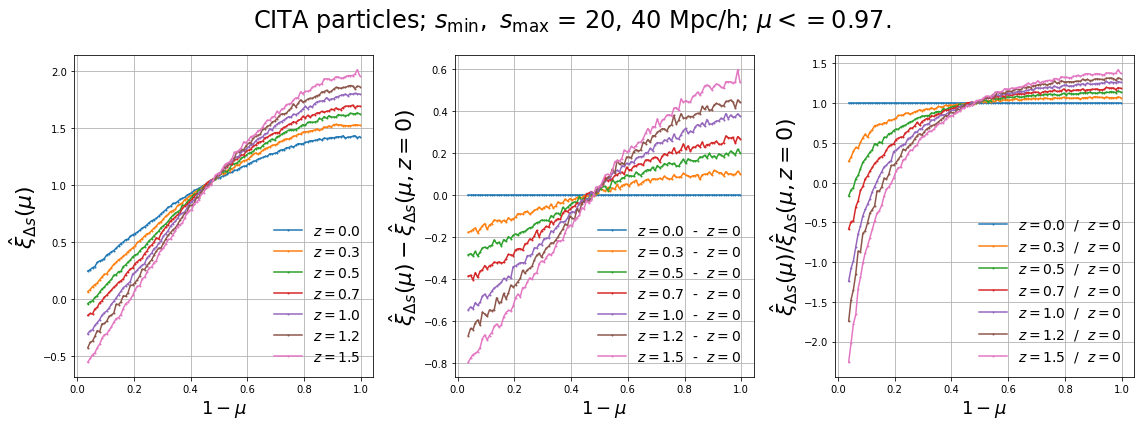

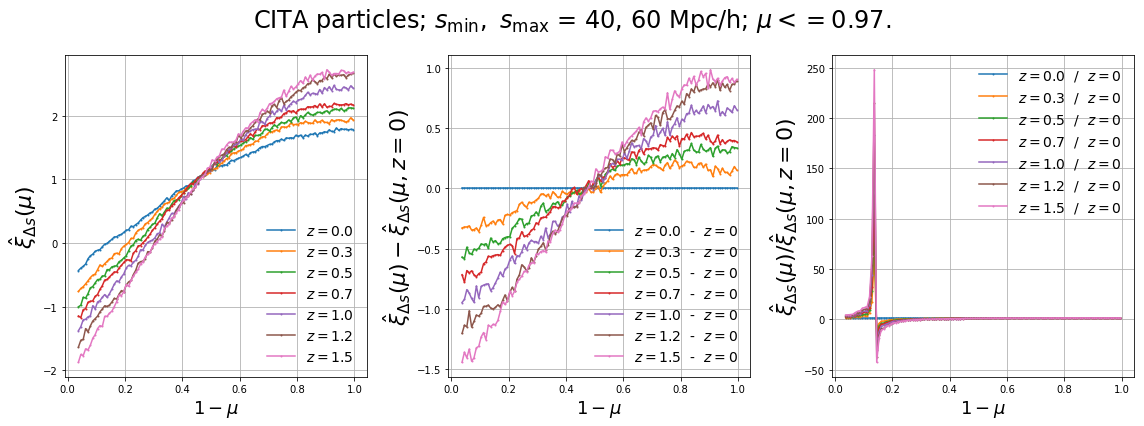

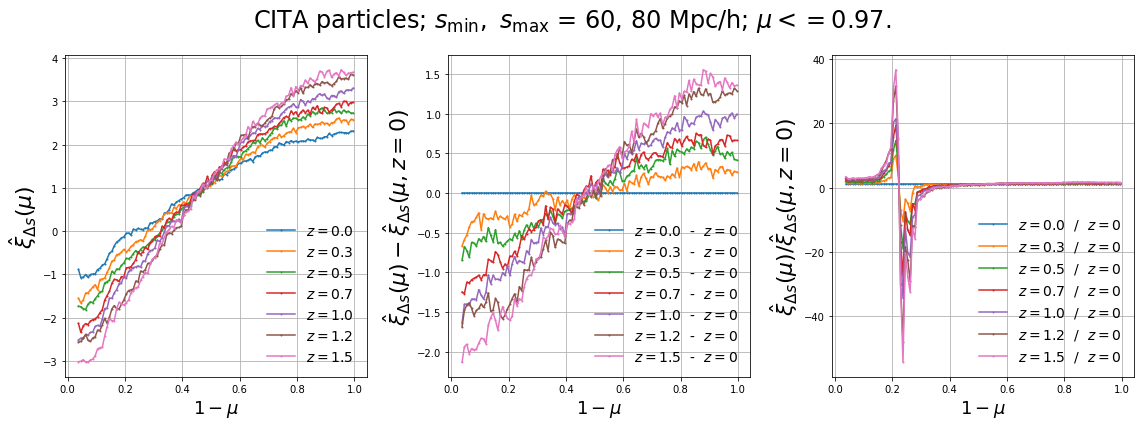

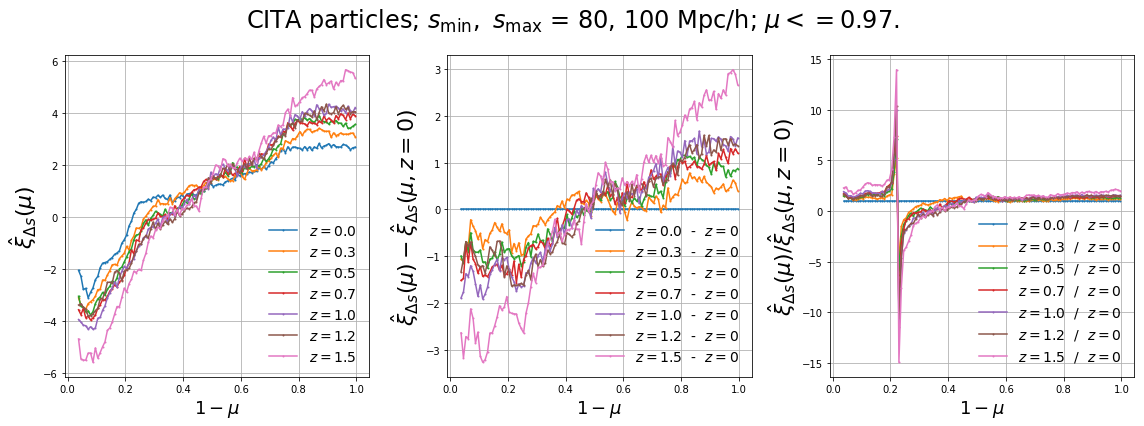

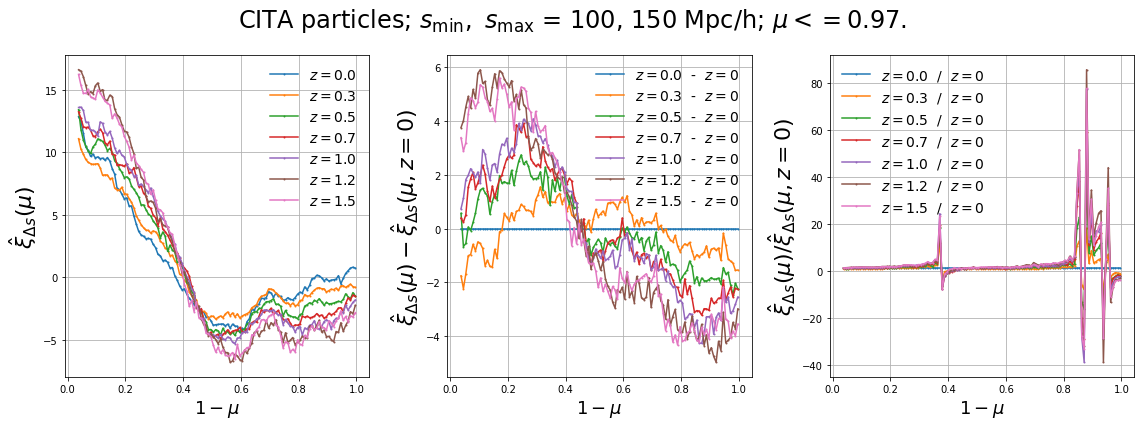

In [5]:
for s_min, s_max, mumax in [[6,40,1.0], [6,40,0.97], [6,40,0.9], [6,40,0.5], 
    [6,20,0.97], [6,40,0.97], [20,40,0.97], 
    [40,60,0.97], 
    [60, 80,0.97], [80, 100,0.97], [100, 150, 0.97]
    ]:
    numsbin=150; nummubin=120;

    fig, axs = plt.subplots(1,3, figsize=(16,6))
    ax1, ax2, ax3 = axs
    Ys = []
    for snapid in [15-0, 15-3, 15-5, 15-7, 15-10, 15-12, 15-15]:    
        # filename, label
        filename = '../CITAData/subsamples/'+\
         'gadget_0%02i'%snapid+'.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        label = r'$z = %.1f'%(redshifts_dict[snapid])+'$'
        ## load in
        data = np.loadtxt(filename); norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
        ## DD, DR and RR
        DD, DR, RR = [data[:,row].reshape(150,120) for row in [3,4,6]]; 
        DD /= norms[0]; DR /= norms[1]; RR /= norms[2]
        # xi, intximu
        xi = np.divide(DD-2*DR+RR,RR)
        intximu = xi[s_min:s_max+1,:].sum(0)
        # X, Y for plot
        imumax = int(nummubin*mumax)
        #intximu = intximu[:imumax]
        mu = data[:,0]; X = np.ones(nummubin) - mu[:nummubin]; 
        X = X[:imumax]; Y = intximu[:imumax]/intximu[:imumax].sum()*len(intximu[:imumax]); 
        Ys.append([xx for xx in Y])
        # make plot
        ax1.plot(X,Y, marker='o', markersize=1, label=label )
        ax2.plot(X, (Y - np.array(Ys[0])), 
                 marker='o', markersize=1, label=label+ r'  -  $z = 0$' )
        ax3.plot(X, np.divide(Y,  np.array(Ys[0])), 
                 marker='o', markersize=1, label=label+ r'  /  $z = 0$' )
    # axes settings    
    for ax in [ax1, ax2, ax3]:
        ax.grid(); ax.set_xlabel('$1-\mu$', fontsize=18)    
        ax.legend(fontsize=14, frameon=False)
    ax1.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$', fontsize=22)
    ax2.set_ylabel(r'$\hat \xi_{\Delta s}(\mu) - \hat \xi_{\Delta s}(\mu, z=0)$', fontsize=22)
    ax3.set_ylabel(r'$\hat \xi_{\Delta s}(\mu) / \hat \xi_{\Delta s}(\mu, z=0)$', fontsize=22)
    # fig settings
    fig.suptitle('CITA particles; $s_{\\rm min},\\ s_{\\rm max}$ = '+str(s_min)+', '+str(s_max)+\
     ' Mpc/h; $\mu <= '+str(mumax)+'$.', fontsize=24,); fig.tight_layout(rect=(0, 0, 1, 0.9)); plt.show()

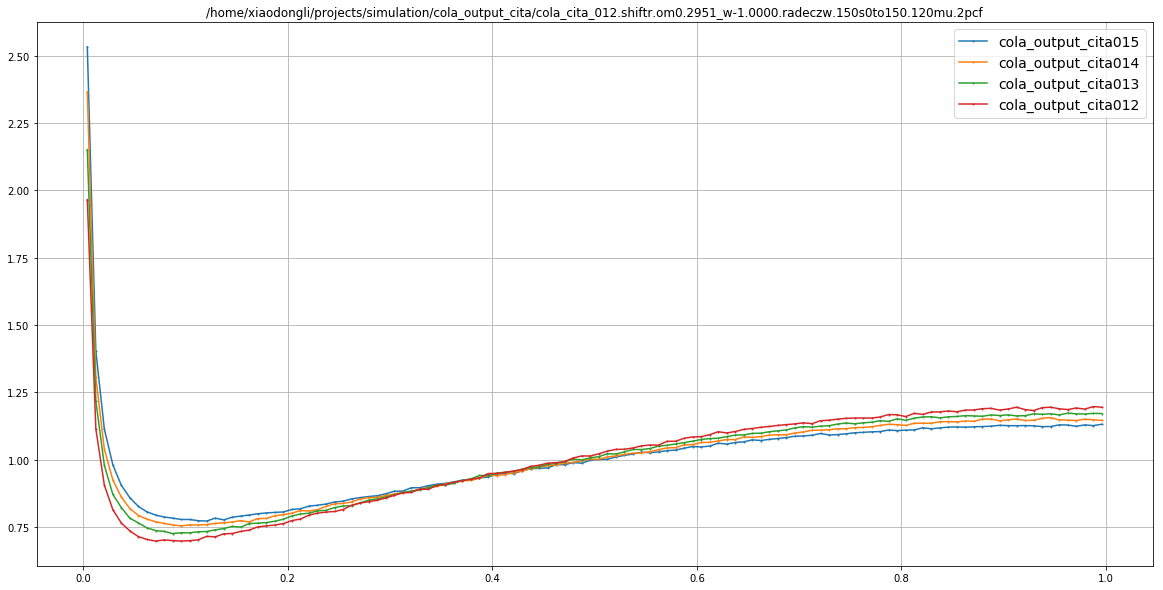

In [35]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
for filename_label in [
    #['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_011.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'CITA_particle011'],
    #['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_012.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'CITA_particle012'],
    #['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_013.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'CITA_particle013'],
    #['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_014.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'CITA_particle014'],
    #['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_015.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'CITA_particle015'],
    ['/home/xiaodongli/projects/simulation/cola_output_cita/cola_cita_015.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_output_cita015'],
    ['/home/xiaodongli/projects/simulation/cola_output_cita/cola_cita_014.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_output_cita014'],
    ['/home/xiaodongli/projects/simulation/cola_output_cita/cola_cita_013.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_output_cita013'],
    ['/home/xiaodongli/projects/simulation/cola_output_cita/cola_cita_012.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_output_cita012']
    #['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_016.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'CITA_particle016'],
    ]:
    filename, label = filename_label
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    data = np.loadtxt(filename)
    numsbin=150; nummubin=120;
    s_min=6; s_max = 40;
    
    xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
    for rows in range(numsbin):
        for rowmu in range(nummubin):
            irow = rows*nummubin+rowmu
            DD = data[irow][3]/norms[0]
            DR = data[irow][4]/norms[1]
            RR = data[irow][6]/norms[2]
            xi[rows][rowmu] = (DD - 2*DR + RR)/RR
    intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
    mu = [data[row][0] for row in range(120)]
    X = [1-data[row][0] for row in range(120)]
    #dmu = [mu[i+1]-mu[i] for i in range(119)]

    int_intximu_to_mu = sum([intximu[row]*1.0/120 for row in range(120)])
    Y = intximu/int_intximu_to_mu
    #Y = intximu

    ax.plot(X, Y, marker='o', markersize=1, label=label )
    ax.set_title(filename)
ax.grid()
ax.legend(fontsize=14)

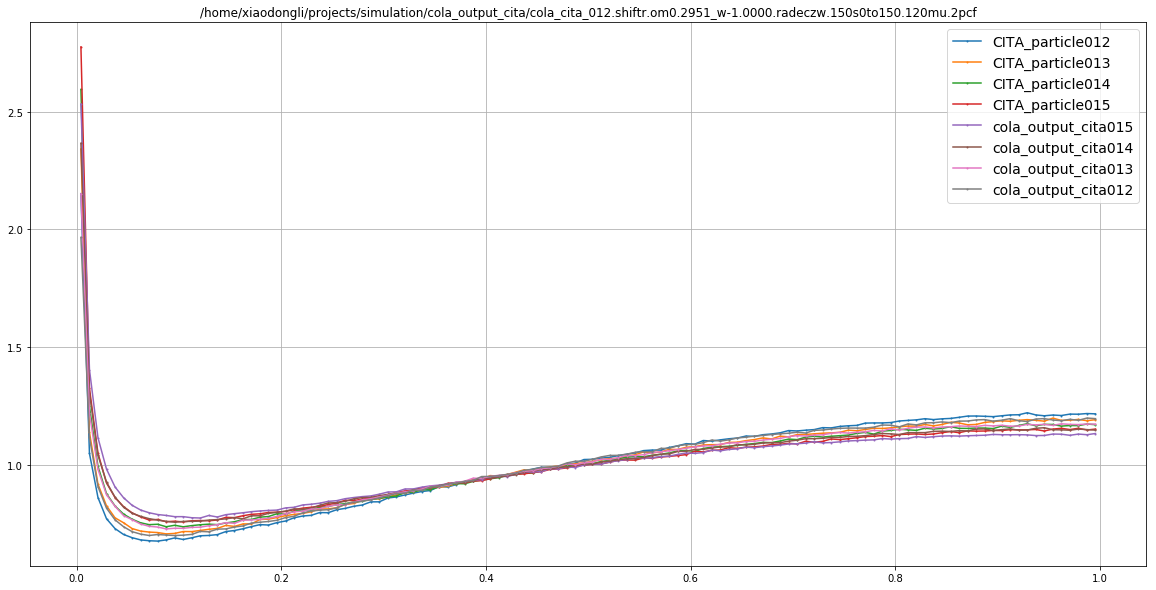

In [11]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
for filename_label in [
    #['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_011.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'CITA_particle011'],
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_012.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle012'],
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_013.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle013'],
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_014.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle014'],
    ['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_015.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'CITA_particle015'],
    ['/home/xiaodongli/projects/simulation/cola_output_cita/cola_cita_015.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_output_cita015'],
    ['/home/xiaodongli/projects/simulation/cola_output_cita/cola_cita_014.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_output_cita014'],
    ['/home/xiaodongli/projects/simulation/cola_output_cita/cola_cita_013.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_output_cita013'],
    ['/home/xiaodongli/projects/simulation/cola_output_cita/cola_cita_012.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_output_cita012']
    #['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_016.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'CITA_particle016'],
    ]:
    filename, label = filename_label
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    data = np.loadtxt(filename)
    numsbin=150; nummubin=120;
    s_min=6; s_max = 40;
    
    xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
    for rows in range(numsbin):
        for rowmu in range(nummubin):
            irow = rows*nummubin+rowmu
            DD = data[irow][3]/norms[0]
            DR = data[irow][4]/norms[1]
            RR = data[irow][6]/norms[2]
            xi[rows][rowmu] = (DD - 2*DR + RR)/RR
    intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
    mu = [data[row][0] for row in range(120)]
    X = [1-data[row][0] for row in range(120)]
    #dmu = [mu[i+1]-mu[i] for i in range(119)]

    int_intximu_to_mu = sum([intximu[row]*1.0/120 for row in range(120)])
    Y = intximu/int_intximu_to_mu
    #Y = intximu

    ax.plot(X, Y, marker='o', markersize=1, label=label )
    ax.set_title(filename)
ax.grid()
ax.legend(fontsize=14)